In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("depression_dataset_treated.csv")

In [3]:
df.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Work/Study Hours,Financial Stress,Sleep Duration,Family History of Mental Illness,Depression
0,0.452381,0.0,0.4,0.0,0.0,0.8,0.5,0.500000,0.25,0.6,0.0,0.0
1,1.000000,0.0,0.8,0.0,0.0,0.6,0.0,0.000000,0.75,0.2,1.0,0.0
2,0.571429,0.0,0.4,0.0,0.0,0.6,0.5,0.000000,0.25,0.2,0.0,0.0
3,0.619048,0.0,0.6,0.0,0.0,1.0,1.0,0.083333,0.25,0.6,1.0,0.0
4,0.714286,0.0,0.8,0.0,0.0,0.6,0.5,0.500000,1.00,0.6,1.0,0.0


In [4]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Work/Study Hours,Financial Stress,Sleep Duration,Family History of Mental Illness,Depression
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,0.501025,0.117997,0.485681,0.148632,0.120814,0.484585,0.492175,0.501989,0.492175,0.446948,0.487089,0.178013
std,0.291919,0.268599,0.349624,0.307630,0.273022,0.349399,0.410643,0.314312,0.353882,0.382292,0.499931,0.382598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238095,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.400000,0.000000,0.000000,0.400000,0.500000,0.500000,0.500000,0.600000,0.000000,0.000000
75%,0.761905,0.000000,0.800000,0.000000,0.000000,0.800000,1.000000,0.750000,0.750000,0.600000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Separar variáveis dependentes e independentes
x = df.drop(columns=['Depression'])
y = df.Depression

<AxesSubplot:>

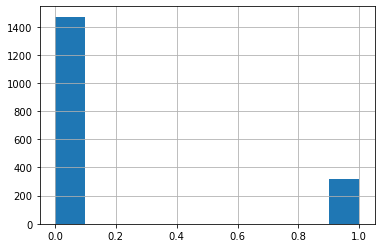

In [6]:
# Dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y)

y_train.hist()

### Aplicar Oversampling nos dados de treino com SMOTE para obter melhores resultados, pois o dataset está altamente desbalanceado sendo apenas 17,80% depressivos e 82,20% não depressivos

<AxesSubplot:>

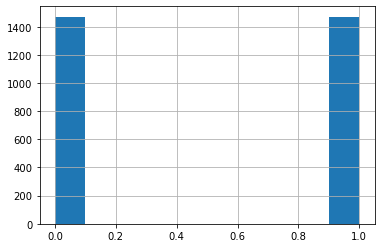

In [7]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_resampled.hist()

In [8]:
# Criação do modelo
rf_smote = RandomForestClassifier()

# Treinamento do modelo
rf_smote.fit(X_train_resampled, y_train_resampled)

# Previsão
y_pred = rf_smote.predict(X_test)

# Avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       630
         1.0       0.71      0.70      0.70       137

    accuracy                           0.89       767
   macro avg       0.82      0.82      0.82       767
weighted avg       0.89      0.89      0.89       767



### GridSearchCV para procurar por melhores parâmetros visando obter melhores resultados

In [9]:
rf_grid = RandomForestClassifier()

# Parâmetros a serem otimizados
param_grid = {
    # Número de árvores 
    'n_estimators': [100, 200, 500],
    # Profundidade máxima das árvores
    'max_depth': [None, 10, 20],
    # Número mínimo de amostrar para separar um nó
    'min_samples_split': [2, 5, 10],
    # Mínimo de amostra por folha
    'min_samples_leaf': [1, 2]
}

# Parâmetros "padrões" para entender como o treinamento se comporta

# Configurando GridSearch
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=3, scoring='accuracy', verbose=3, n_jobs=1)

# Treinando o modelo com os dados
model_grid = grid_search.fit(X_train_resampled, y_train_resampled)

# Resultados dos parâmetros encontrados no GridSearch
print("Melhores parâmetros: ", grid_search.best_params_)
print("Melhores Modelo: ", grid_search.best_estimator_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.893 total time=   0.3s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.954 total time=   0.4s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.972 total time=   0.3s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.899 total time=   0.7s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.955 total time=   0.6s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.969 total time=   0.7s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.896 total time=   1.6s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.9

In [10]:
# Criação do modelo com os melhores parâmetros de acordo com o GridSearch
rf_optimized = model_grid.best_estimator_
rf_optimized

RandomForestClassifier(n_estimators=200)

In [11]:
y_pred_optimized = rf_optimized.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       630
         1.0       0.72      0.70      0.71       137

    accuracy                           0.90       767
   macro avg       0.83      0.82      0.82       767
weighted avg       0.90      0.90      0.90       767

